In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/detectron2_detectionn.zip"


Archive:  /content/drive/MyDrive/detectron2_detectionn.zip
   creating: detectron2_detectionn/
   creating: detectron2_detectionn/test/
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4092000_image_620_jpeg.rf.dc56a4b2052c8706dba9b33f8cfcf610.jpg  
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4092000_image_620_jpeg.rf.dc56a4b2052c8706dba9b33f8cfcf610.json  
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4097000_image_493_jpeg.rf.333cc8bc9e49a46f346f1dce38cf6a6c.jpg  
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4097000_image_493_jpeg.rf.333cc8bc9e49a46f346f1dce38cf6a6c.json  
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4097000_image_493_jpeg.rf.afc370aee2c53c12e04d4df0a3d94996.jpg  
  inflating: detectron2_detectionn/test/2018_TEAK_3_316000_4097000_image_493_jpeg.rf.afc370aee2c53c12e04d4df0a3d94996.json  
  inflating: detectron2_detectionn/test/55_jpeg.rf.a6dd02e8ee8feb7108b6c91a6b9ab1b3.jpg  
  inflating: detectron2_det

In [ ]:
!unzip "/content/drive/MyDrive/output.zip"


Archive:  /content/drive/MyDrive/output.zip
   creating: output/
  inflating: output/events.out.tfevents.1671267313.c0ce9073db06.73.0  
  inflating: output/events.out.tfevents.1671547755.DESKTOP-BLAICVL.22676.1  
 extracting: output/last_checkpoint  
  inflating: output/metrics.json     
  inflating: output/model_final.pth  
  inflating: output/output.yaml      


In [3]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp38-cp38-linux_x86_64.whl size=44089 sha256=19ac759a2852dcdee552b1ee27c627821ff3e4406eb215e43f5950ebefe55aca
  Stored in directory: /root/.cache/pip/wheels/52/dd/2b/10ff8b0ac81b93946bb5fb9e6749bae2dac246506c8774e6cf
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

In [4]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=2d24cefba2c2ae477d698ecb8adc78031f875235ba83223129acc60ac04b7c20
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd7365

In [1]:
import torch
assert torch.__version__.startswith("1.8") 
import torchvision
import cv2
     

In [2]:
import os
import numpy as np
import json
import random
import matplotlib.pyplot as plt
%matplotlib inline

from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

In [3]:
def get_data_dicts(directory, classes):
    dataset_dicts = []
    for filename in [file for file in os.listdir(directory) if file.endswith('.json')]:
        json_file = os.path.join(directory, filename)
        with open(json_file) as f:
            img_anns = json.load(f)

        record = {}
        
        filename = os.path.join(directory, img_anns["imagePath"])
        
        record["file_name"] = filename
        record["height"] = img_anns['imageHeight']
        record["width"] = img_anns['imageWidth']
      
        annos = img_anns["shapes"]
        objs = []
        for anno in annos:
            px = [a[0] for a in anno['points']] # x coord
            py = [a[1] for a in anno['points']] # y-coord
            poly = [(x, y) for x, y in zip(px, py)] # polty for segmentaion
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "category_id": classes.index(anno['label']),
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [4]:

classes = ['water', 'tree']

data_path = '/content/detectron2_detectionn/'

for d in ["train", "test"]:
    DatasetCatalog.register(
        "my_" + d, 
        lambda d=d: get_data_dicts(data_path+d, classes)
    )
    MetadataCatalog.get("my_" + d).set(thing_classes=classes)

microcontroller_metadata = MetadataCatalog.get("my_train")

In [5]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from matplotlib.patches import Rectangle
     

In [6]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from matplotlib.patches import Rectangle

cfg = get_cfg() 
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")) 
cfg.DATASETS.TRAIN = ("my_train") 
cfg.DATASETS.TEST = ()
#cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml") 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.GAMMA = 0.05 
cfg.SOLVER.STEPS = [500] 
cfg.TEST.EVAL_PERIOD = 200 

cfg.SOLVER.MAX_ITER = 2000 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
cfg.MODEL.DEVICE='cuda'

In [7]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) 
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True) 

[01/29 16:06:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_f6e8b1.pkl: 243MB [00:06, 36.5MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


In [8]:
trainer.train() 


[01/29 16:06:27 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/29 16:06:37 d2.utils.events]:  eta: 0:17:04  iter: 19  total_loss: 1.739  loss_cls: 1.327  loss_box_reg: 0.2158  loss_rpn_cls: 0.1039  loss_rpn_loc: 0.02133  time: 0.5102  data_time: 0.0266  lr: 1.931e-06  max_mem: 2557M
[01/29 16:06:47 d2.utils.events]:  eta: 0:16:10  iter: 39  total_loss: 1.712  loss_cls: 1.285  loss_box_reg: 0.2539  loss_rpn_cls: 0.1286  loss_rpn_loc: 0.02351  time: 0.4977  data_time: 0.0061  lr: 2.911e-06  max_mem: 2557M
[01/29 16:06:57 d2.utils.events]:  eta: 0:16:08  iter: 59  total_loss: 1.528  loss_cls: 1.18  loss_box_reg: 0.1926  loss_rpn_cls: 0.1194  loss_rpn_loc: 0.01822  time: 0.5031  data_time: 0.0060  lr: 3.891e-06  max_mem: 2557M
[01/29 16:07:08 d2.utils.events]:  eta: 0:16:04  iter: 79  total_loss: 1.655  loss_cls: 1.083  loss_box_reg: 0.2978  loss_rpn_cls: 0.1431  loss_rpn_loc: 0.0277  time: 0.5054  data_time: 0.0059  lr: 4.871e-06  max_mem: 2557M
[01/29 16:07:18 d2.utils.events]:  eta: 0:15:58  iter: 99  total_loss: 1.422  loss_cls: 0.9621  loss_b

In [9]:
#import tensorboard
#!pip install tensorboard --user
#!pip install tensorflow
!pip install tensorboard
import tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorboard

In [10]:
%load_ext tensorboard 
%tensorboard --logdir output

ModuleNotFoundError: ignored

In [11]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth") 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("my_test", ) 
predictor = DefaultPredictor(cfg) 
test_metadata = MetadataCatalog.get("my_test")
test_dataset_dicts = get_data_dicts(data_path+'test', classes)

In [ ]:
#cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.58 # Test için Eşik Değerimiz


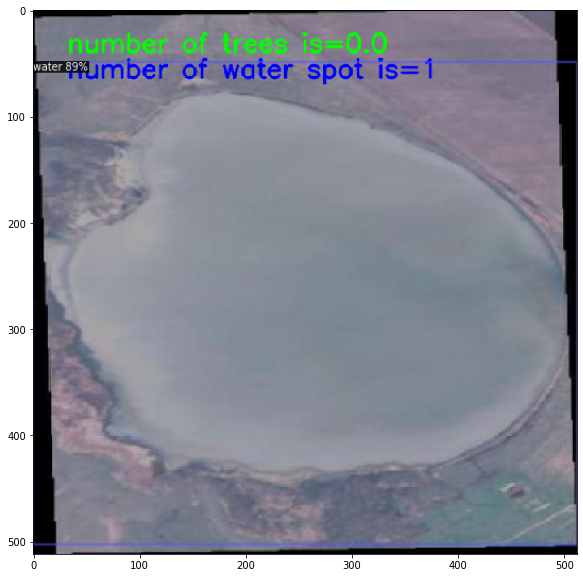

[0, 60, 640, 628]


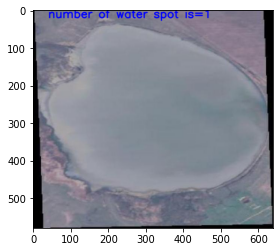

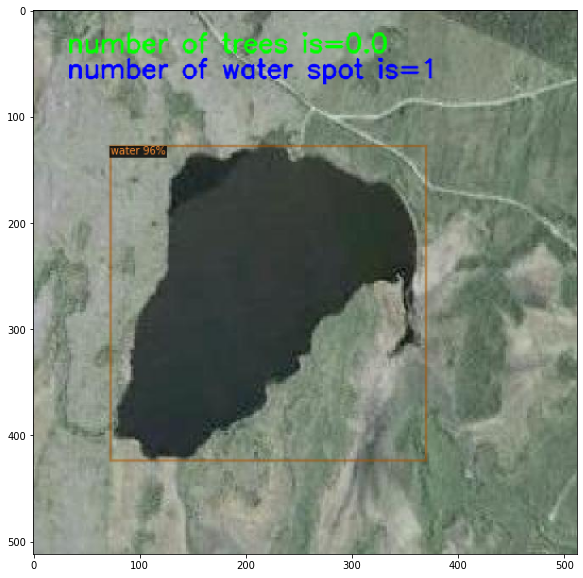

[91, 160, 462, 530]


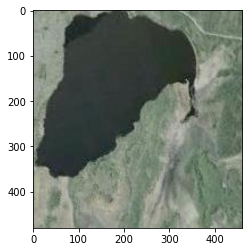

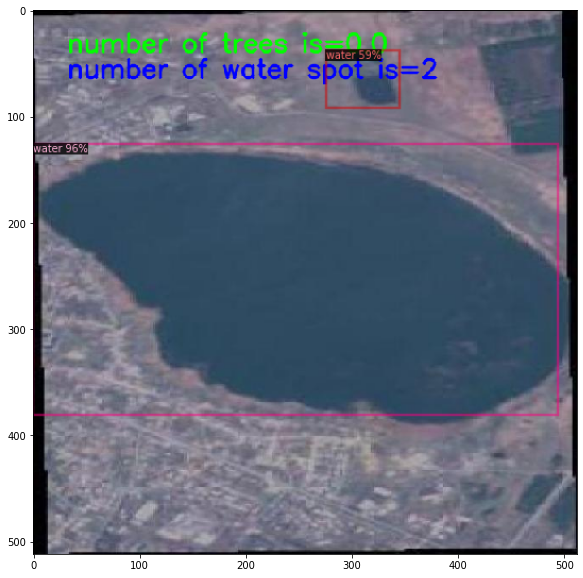

[0, 157, 617, 476]


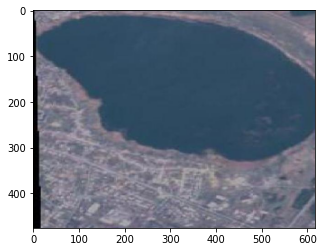

[344, 46, 430, 114]


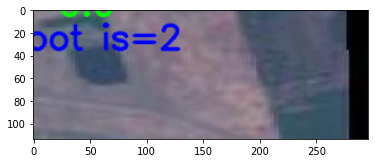

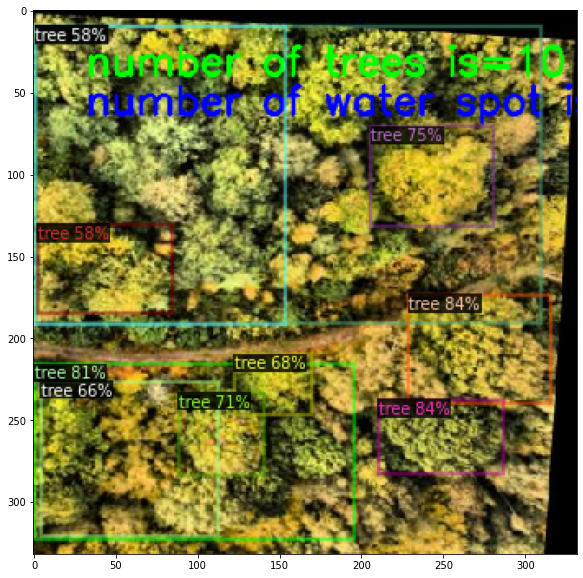

[263, 298, 358, 354]


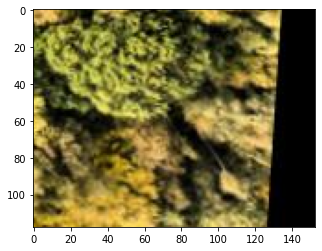

[286, 218, 395, 301]


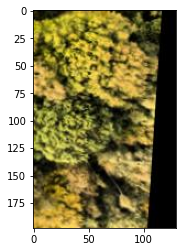

[2, 13, 387, 240]


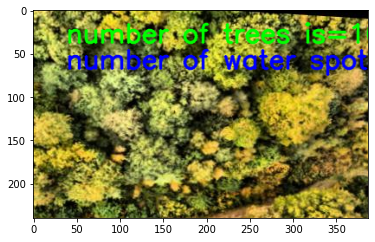

[1, 271, 244, 404]


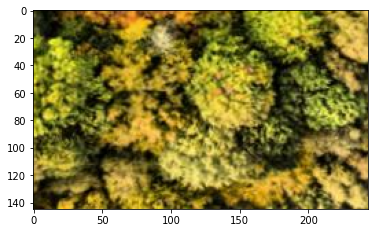

[257, 90, 351, 165]


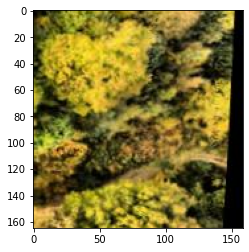

[111, 293, 176, 355]


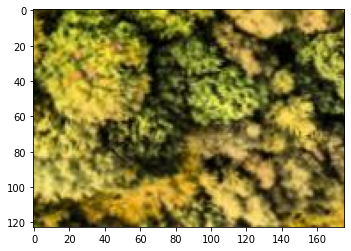

[153, 263, 212, 310]


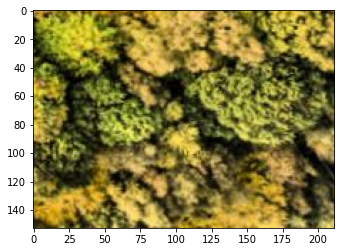

[6, 284, 140, 402]


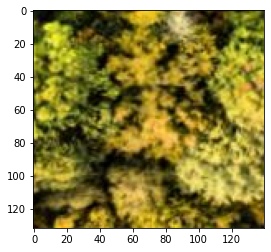

[3, 164, 106, 232]


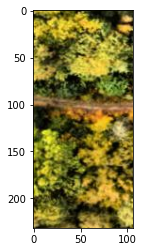

[1, 13, 192, 240]


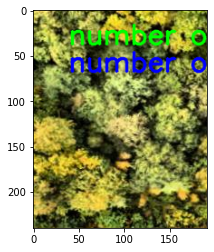

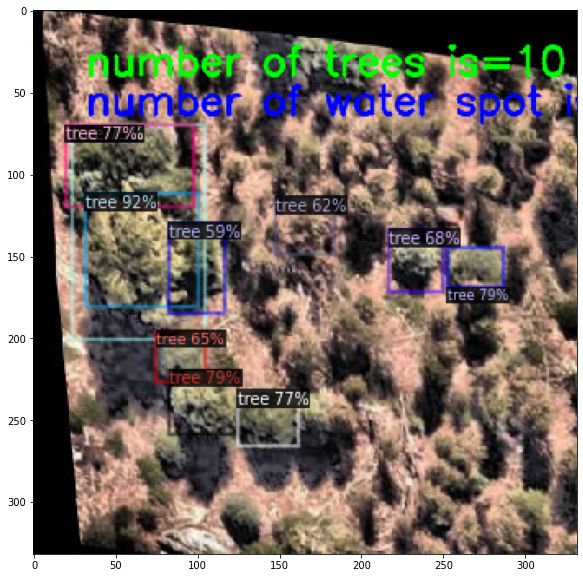

[39, 140, 126, 227]


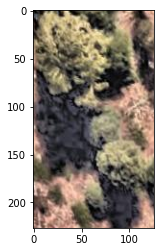

[316, 181, 358, 212]


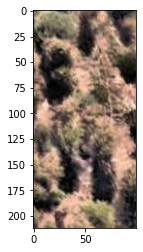

[104, 275, 155, 324]


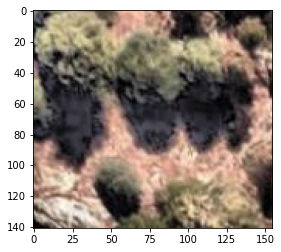

[24, 89, 122, 150]


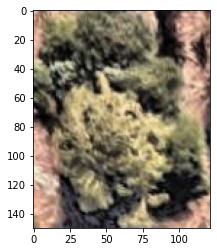

[156, 290, 202, 333]


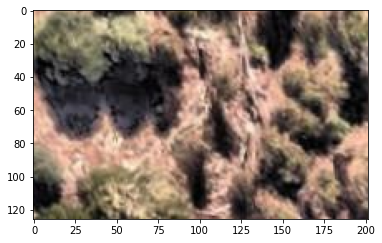

[29, 88, 130, 251]


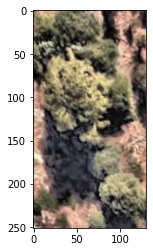

[271, 168, 312, 215]


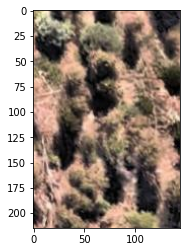

[94, 245, 131, 284]


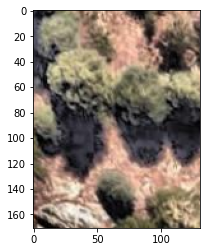

[185, 143, 230, 187]


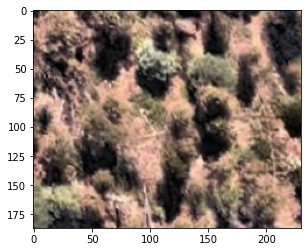

[103, 163, 146, 231]


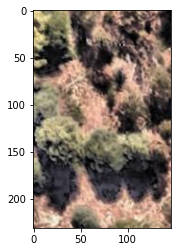

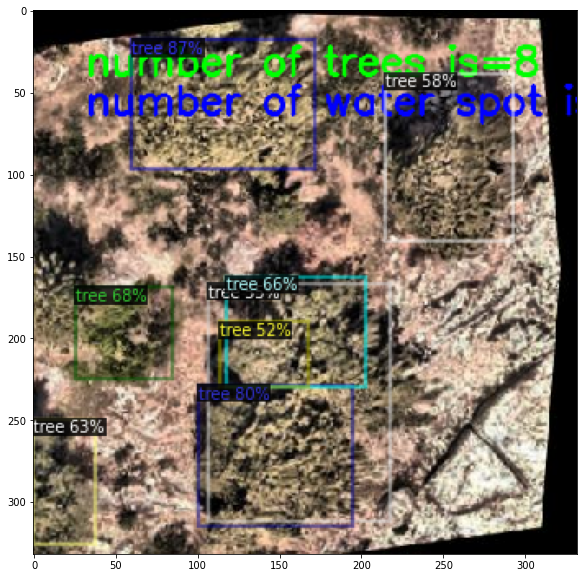

[75, 23, 215, 122]


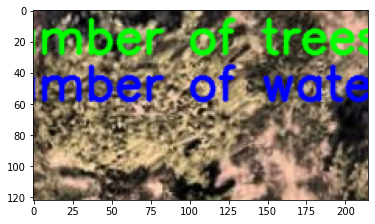

[126, 286, 244, 394]


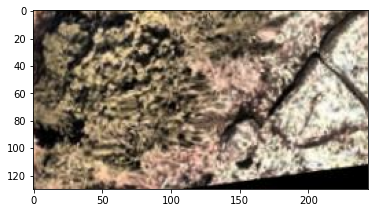

[32, 212, 106, 282]


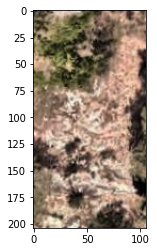

[146, 204, 254, 288]


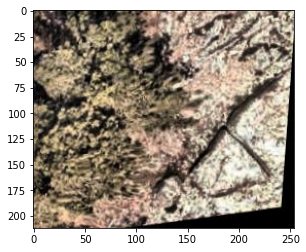

[0, 313, 46, 407]


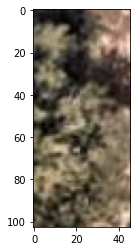

[268, 49, 365, 177]


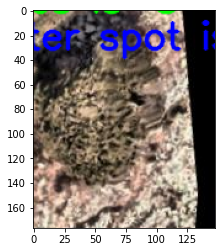

[133, 209, 272, 391]


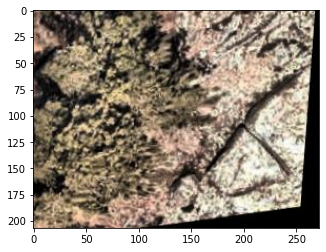

[142, 239, 209, 288]


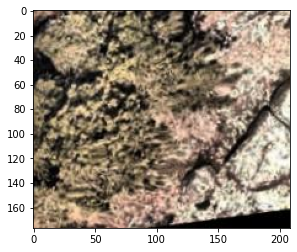

In [41]:
for d in random.sample(test_dataset_dicts, 6):    
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    counter = []
    water = []
    for key, value in outputs.items():
      tree = value.get('pred_classes')
      for o in tree:
        if o==1:
          counter.append(1)
        else:
          if o==0:
            water.append(1)
              
    cv2.putText(img, 'number of trees is='+str(np.sum(counter)), (40, 50), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(img, 'number of water spot is='+str(np.sum(water)), (40, 80), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255, 0, 0), 2, cv2.LINE_AA)    
        #counter.append(len(value))
        #cv2.putText(img, 'Counter='+str(counter), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255, 0, 0), 2, cv2.LINE_AA)
    v = Visualizer(img[:, :, ::-1],
                   metadata=microcontroller_metadata, 
                   scale=0.8, 
                   #instance_mode=ColorMode.IMAGE_BW # removes the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (20, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()
    m = value.get('pred_boxes')
      #print(tree[0])
    for k in m:
      #print(k)

      #print(v)
      plt.show()
      e = k.cpu().numpy()
      X , Y , W , H = int(e[0]),int(e[1]),int(e[2]),int(e[3])
      print([X , Y , W , H])
      #cv2.imwrite('image1.jpg',img[:, :, ::-1])
      cropped_image = img[Y:Y+H , X:X+W]
      #for x in cropped_image:
      plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
      #plt.imsave('saved images'+str(x)+'.jpg',cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
      cv2.imwrite('Saved Image'+str(k)+'.jpg',cropped_image)

In [ ]:
outputs

{'instances': Instances(num_instances=6, image_height=416, image_width=416, fields=[pred_boxes: Boxes(tensor([[273.9533, 151.4962, 372.5904, 241.5129],
         [291.0186,  97.2418, 392.0548, 169.6456],
         [263.1322, 279.2461, 308.8652, 325.7283],
         [100.7021, 148.3603, 141.5423, 196.7532],
         [173.6603, 285.9444, 265.2545, 330.8774],
         [282.3371,  91.1064, 385.0612, 276.4253]], device='cuda:0')), scores: tensor([0.9336, 0.7350, 0.7339, 0.5922, 0.5452, 0.5109], device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 1, 1], device='cuda:0')])}

tensor([ 91.4316, 160.2743, 462.3639, 530.4969], device='cuda:0')


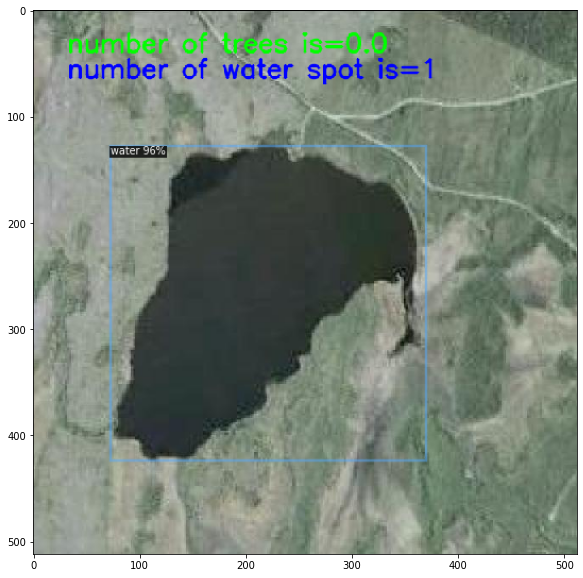

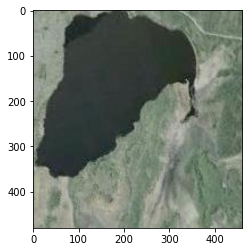

In [19]:
for key, value in outputs.items():
      m = value.get('pred_boxes')
      #print(tree[0])
      for k in m:
        print(k)
        v = Visualizer(img[:, :, ::-1],
                   metadata=microcontroller_metadata, 
                   scale=0.8,)
        #print(v)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.figure(figsize = (20, 10))
        plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
        plt.show()
        e = k.cpu().numpy()
        X , Y , W , H = int(e[0]),int(e[1]),int(e[2]),int(e[3])
        cv2.imwrite('image1.jpg',img[:, :, ::-1])
        cropped_image = img[Y:Y+H , X:X+W]
        for x in range(0,len(e)):
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            cv2.imwrite(str(x)+'.jpg',cropped_image)
            



In [ ]:
#print([(k, outputs[k]) for k in outputs])
#counter = []
#for key, value in outputs.items():
    #counter.append(len(value))
#str(counter) 
outputs

{'instances': Instances(num_instances=3, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[381.3505, 206.3917, 517.0080, 384.1114],
         [560.9838, 377.7982, 637.7944, 520.6185],
         [244.3202, 193.7941, 387.6442, 388.4757]])), scores: tensor([0.9955, 0.8585, 0.8416]), pred_classes: tensor([1, 1, 1])])}

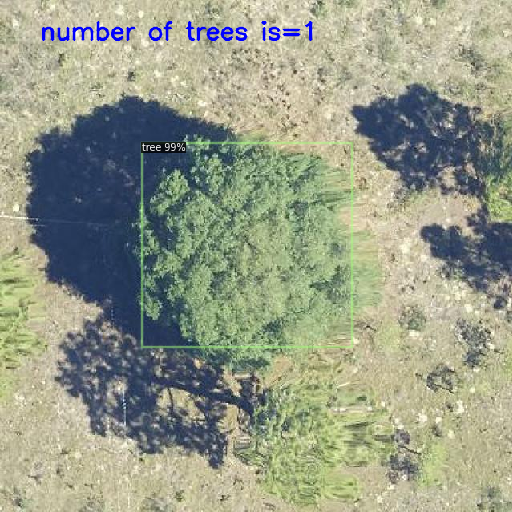

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob
from google.colab.patches import cv2_imshow
for imageName in glob.glob('/content/unnamed_plot_99_competition_resultat_jpg.rf.c42307e0dffab2f6029ff617785c812d.jpg'):
  img2 = cv2.imread(imageName)
  outputss = predictor(img2)
  counterr = []
  

  listt = []
  for key, value in outputss.items():
    #print(value)
    tree = value.get('pred_classes')
    #print(tree)
    for o in tree:
      if o==1:
        listt.append(1)
      else:
        break  
    cv2.putText(img2, 'number of trees is='+str(np.sum(listt)), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1 , (255, 0, 0), 2, cv2.LINE_AA)
        #listt.clear()
        #listt.index
    #print(listt[-1])     
  v = Visualizer(img2[:, :, ::-1],metadata=test_metadata, scale=0.8)
  out = v.draw_instance_predictions(outputss["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  

In [ ]:
import operator

#addad=0
listt = []
for key, value in outputss.items():
  #print(value)
  tree = value.get('pred_classes')
  #print(tree)
  for o in tree:
    if o==1:
      listt.append(1)
      #print(len(listt))
      #print(listt)
      sum = np.sum(listt)
print(sum)
      #addad = addad +1
      #addad = operator.add(addad, 1)
      #print(addad)

    #for z in tree:
      #print(z.)
      #print(z)
      #if z.item==1:
        #conunteer +=1
   #print(conunteer)
    #print(len(tree))
  #print(value)
        #counterr.append(len(value))

10


In [ ]:
#for i in v.metadata.as_dict()['thing_classes']if i=='tree':
 # print(i)

#[i for i in v.metadata.as_dict()['thing_classes'] if i=='tree']
counterr=[]
for i in v.metadata.as_dict()['thing_classes']:
  if i=='tree':
    print(i)
    for key, value in outputss.items():
          counterr.append(len(value))
          print("tree count=",counterr)
          

        

tree
tree count= [1]


In [ ]:
outputss

{'instances': Instances(num_instances=10, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 97.7061, 497.0918, 201.6729, 621.9189],
         [377.6954, 143.2729, 479.7993, 319.1352],
         [436.7039,  65.6562, 503.3839, 133.5166],
         [502.2767, 522.3618, 634.6996, 630.8002],
         [217.1619, 291.2229, 317.0232, 375.3167],
         [ 36.6502,   5.9075, 136.4325, 112.2699],
         [226.6931,  11.3894, 294.8768,  98.1026],
         [184.2738, 163.0617, 285.4729, 260.1521],
         [237.2198, 466.0053, 329.7305, 570.9454],
         [522.6530,  67.4020, 630.5800, 257.5326]], device='cuda:0')), scores: tensor([0.9972, 0.9962, 0.9932, 0.9931, 0.9918, 0.9913, 0.9902, 0.9852, 0.9597,
         0.9186], device='cuda:0'), pred_classes: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')])}

In [ ]:
#print([(k, outputs[k]) for k in outputs])
counter = []
for key, value in outputss.items():
    counter.append(len(value))
str(counter) 

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob
from google.colab.patches import cv2_imshow
for imageName in glob.glob('/content/drive/MyDrive/proje/resim_video/a.jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:

from detectron2.config import get_cfg
cfg = get_cfg() 
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")) #Yapılandırma Dosyası
cfg.DATASETS.TRAIN = ("my_train",) 
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2 
cfg.SOLVER.IMS_PER_BATCH = 2 
cfg.SOLVER.BASE_LR = 0.001 
cfg.SOLVER.GAMMA = 0.05 
cfg.SOLVER.STEPS = [500] 
cfg.TEST.EVAL_PERIOD = 200 
cfg.SOLVER.MAX_ITER = 2000 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.58
test_dataset_dicts = get_data_dicts(data_path+'train', classes)

cfg.merge_from_list(["MODEL.WEIGHTS", "weights.pth"])   # can also load values from a list of str
print(cfg.dump())  # print formatted configs
with open("output.yaml", "w") as f:
  f.write(cfg.dump())   # save config to file

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST: []
  TRAIN:
  - my_train
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEV

In [ ]:
!git clone https://github.com/facebookresearch/detectron2


Cloning into 'detectron2'...
remote: Enumerating objects: 14651, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 14651 (delta 26), reused 37 (delta 15), pack-reused 14584
Receiving objects: 100% (14651/14651), 6.01 MiB | 19.59 MiB/s, done.
Resolving deltas: 100% (10584/10584), done.


In [ ]:
%run detectron2/demo/demo.py --config-file /content/output.yaml --video-input /content/drive/MyDrive/Facebook.mp4 --confidence-threshold 0.58 --output video-output.mp4 \
  --opts MODEL.WEIGHTS /content/output/model_final.pth
     

[12/17 10:36:55 detectron2]: Arguments: Namespace(confidence_threshold=0.58, config_file='/content/output.yaml', input=None, opts=['MODEL.WEIGHTS', '/content/output/model_final.pth'], output='video-output.mp4', video_input='/content/drive/MyDrive/Facebook.mp4', webcam=False)
[12/17 10:36:56 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/output/model_final.pth ...


100%|██████████| 1780/1780 [06:17<00:00,  4.71it/s]


<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files
files.download('/content/video-output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

from google.colab import files
files.download('/content/output/model_final.pth')